<a href="https://colab.research.google.com/github/adindaayundra/DeteksiKankerKulit-MBKM-Riset/blob/main/DeteksiKankerKulit_Cnn_MbkmRiset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Data (Data Preparation)**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
import os
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D

In [ ]:
# Memasukkan lokasi Dataset Jenis Kanker Kulit

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset"

ham10000_images_part_1	hmnist_28_28_L.csv    test     train_lama
ham10000_images_part_2	hmnist_28_28_RGB.csv  test_1   val_1
HAM10000_metadata.csv	hmnist_8_8_L.csv      train
healthy_skin		hmnist_8_8_RGB.csv    train_1


In [ ]:
path = "/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset"

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear



* Identifikasi dan Menghapus Duplikat
 
  (Identify and Remove Duplicates)


In [ ]:
df.drop_duplicates(inplace=True)


*   **Pembersihan Data**

    (Data Cleaning)


In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


*   Menangani Masalah 

    (Handling the Problem) :

 1. Detecting "Na" and "na" Values
 2. Fill na Values with Mean of "age" Column


1. Detecting "Na" and "na" Values

In [ ]:
missing_value = ['N/a', 'na', ' ', np.nan]
df = pd.read_csv("/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/HAM10000_metadata.csv", na_values=missing_value)

In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
df.isnull().any()

lesion_id       False
image_id        False
dx              False
dx_type         False
age              True
sex             False
localization    False
dtype: bool

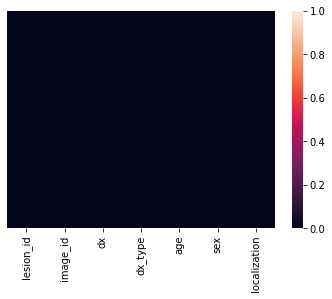

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

2. Fill na Values with Mean of "age" Column

In [ ]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Exploratory Data Analysis

In [ ]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


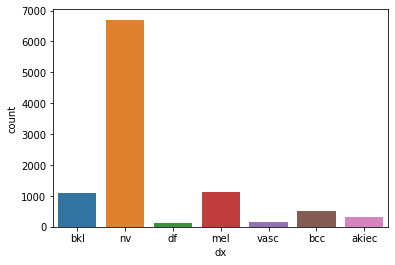

In [ ]:
sns.countplot(df['dx'])

In [ ]:
dx = df['dx'].value_counts().sort_index()
print(dx)

akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: dx, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

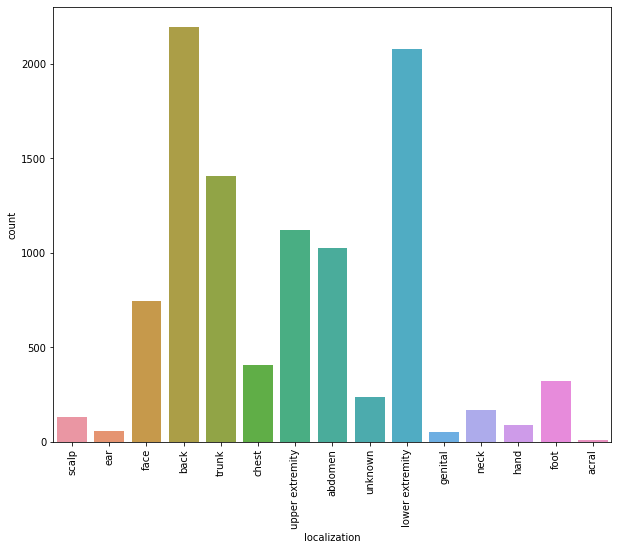

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df['localization'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


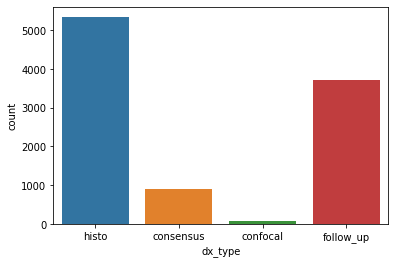

In [ ]:
sns.countplot(df['dx_type'])

In [ ]:
dx_type = df['dx_type'].value_counts().sort_index()
print(dx_type)

confocal       69
consensus     902
follow_up    3704
histo        5340
Name: dx_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


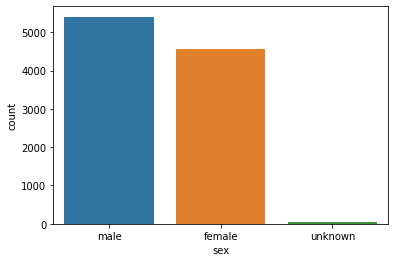

In [ ]:
sns.countplot(df['sex'])

In [ ]:
sex = df['sex'].value_counts().sort_index()
print(sex)

female     4552
male       5406
unknown      57
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

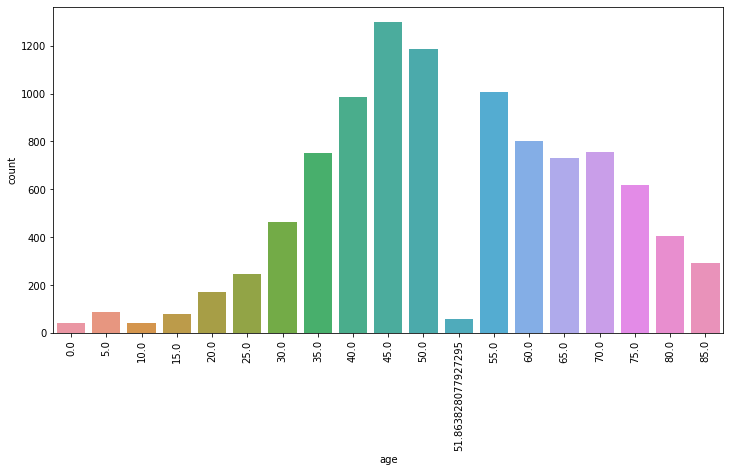

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['age'])
plt.xticks(rotation = 90)

In [ ]:
age = df['age'].value_counts().sort_index()
print(age)

0.000000       39
5.000000       86
10.000000      41
15.000000      77
20.000000     169
25.000000     247
30.000000     464
35.000000     753
40.000000     985
45.000000    1299
50.000000    1187
51.863828      57
55.000000    1009
60.000000     803
65.000000     731
70.000000     756
75.000000     618
80.000000     404
85.000000     290
Name: age, dtype: int64



*   Record the Label Names



In [ ]:
labels = ['Actinic Keratoses',
          'Basal Cell Carcinoma',
          'Benign Keratosis',
          'Dermatofibroma',
          'Melanocytic Nevi',
          'Melanoma',
          'Vascular Skin Lesions']

num_classes = len(labels)
print(num_classes)

7



*   Create Local Data Directory



In [ ]:
data_dir = 'data'
os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(data_dir, 'val')
os.mkdir(val_dir)

test_dir = os.path.join(data_dir, 'test')
os.mkdir(test_dir)



*   Create Directory for Each Category in Train/Validation/Test Directory



In [ ]:
categories = dx.index.values
for category in categories:
    os.mkdir(os.path.join(train_dir, category))
    os.mkdir(os.path.join(val_dir, category))
    os.mkdir(os.path.join(test_dir, category))


*   Split to Train and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_tmp = train_test_split(df, test_size = 0.2, random_state = 101, stratify = df['dx'])
df_val, df_test = train_test_split(df_tmp, test_size = 0.5, random_state = 101)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(8012, 7)
(1001, 7)
(1002, 7)


In [ ]:
# image_id as df index
df_train = df_train.set_index('image_id')
df_val   = df_val.set_index('image_id')
df_test  = df_test.set_index('image_id')

In [ ]:
folder_1 = os.listdir('/content/gdrive/MyDrive/Mbkm Riset/project_mbkmriset/dataset/ham10000_images_part_1') 
folder_2 = os.listdir('/content/gdrive/MyDrive/Mbkm Riset/project_mbkmriset/dataset/ham10000_images_part_2') 

def copy_files(df, data_dir):
  fileList = df.index.values

  for file in fileList:
    fname = file + '.jpg'
    label = df.loc[file, 'dx']

    if fname in folder_1:
      src = os.path.join('/content/gdrive/MyDrive/Mbkm Riset/project_mbkmriset/dataset/ham10000_images_part_1', fname) #dilengkapi
      dst = os.path.join(data_dir, label, fname)
      shutil.copyfile(src, dst)

    if fname in folder_2:
      src = os.path.join('/content/gdrive/MyDrive/Mbkm Riset/project_mbkmriset/dataset/ham10000_images/part_2', fname) #dilengkapi
      dst = os.path.join(data_dir, label, fname)
      shutil.copyfile(src, dst)

Alternative 1

In [ ]:
copy_files(df_train, train_dir)
copy_files(df_val, val_dir)
copy_files(df_test, test_dir) # FIXME: BUG! EMBUH APA!! HAHAHA

FileNotFoundError: ignored

In [ ]:
from shutil import make_archive
shutil.make_archive('data', 'zip', root_dir='/content/data')

'/content/data.zip'

In [ ]:
from google.colab import files
files.download('/content/data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Alternative 2 after
- We download data.zip and we can access from Gdrive

In [ ]:
train_dir = pathlib.Path("/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1") 
val_dir = pathlib.Path("/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/val_1") 
test_dir = pathlib.Path("/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/test_1") 

In [ ]:
df_train['dx'].value_counts()

nv       5364
mel       890
bkl       879
bcc       411
akiec     262
vasc      114
df         92
Name: dx, dtype: int64

In [ ]:
df_val['dx'].value_counts()

nv       670
mel      115
bkl      110
bcc       52
akiec     28
vasc      16
df        10
Name: dx, dtype: int64

In [ ]:
df_test['dx'].value_counts()

nv       671
bkl      110
mel      108
bcc       51
akiec     37
df        13
vasc      12
Name: dx, dtype: int64

In [ ]:
print(len(os.listdir('/content/data/train/akiec')))
print(len(os.listdir('/content/data/train/bcc')))
print(len(os.listdir('/content/data/train/bkl')))
print(len(os.listdir('/content/data/train/df')))
print(len(os.listdir('/content/data/train/mel')))
print(len(os.listdir('/content/data/train/nv')))
print(len(os.listdir('/content/data/train/vasc')))

0
0
1
0
0
0
0


In [ ]:
print(len(os.listdir('/content/data/train/akiec')))
print(len(os.listdir('/content/data/train/bcc')))
print(len(os.listdir('/content/data/train/bkl')))
print(len(os.listdir('/content/data/train/df')))
print(len(os.listdir('/content/data/train/mel')))
print(len(os.listdir('/content/data/train/nv')))
print(len(os.listdir('/content/data/train/vasc')))

0
0
1
0
0
0
0


In [ ]:
print(len(os.listdir('/content/data/train/akiec')))
print(len(os.listdir('/content/data/train/bcc')))
print(len(os.listdir('/content/data/train/bkl')))
print(len(os.listdir('/content/data/train/df')))
print(len(os.listdir('/content/data/train/mel')))
print(len(os.listdir('/content/data/train/nv')))
print(len(os.listdir('/content/data/train/vasc')))

0
0
1
0
0
0
0


In [ ]:
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/akiec')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/bcc')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/bkl')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/df')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/mel')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/nv')))
print(len(os.listdir('/content/gdrive/My Drive/Mbkm Riset/project_mbkmriset/dataset/train_1/vasc')))

262
411
0
0
0
1975
114


In [ ]:
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/akiec')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/kcc')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/bkl')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/df')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/mel')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/nv')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/val_1/vasc')))

In [ ]:
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/akiec')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/kcc')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/bkl')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/df')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/mel')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/nv')))
print(len(os.listdir('/content/gdrive/My Drive/project_mbkmriset/dataset/test_1/vasc')))


*   Data Augmentation and Flow Data



In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

train_generator = train_datagen.flow_from_directory('/content/data/train',
                                                    target_size = (224, 224),
                                                    batch_size = 20,
                                                    color_mode = 'rgb',
                                                    shuffle = True,
                                                    seed = 42,
                                                    class_mode = 'categorical')

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        horizontal_flip = True,
                                        vertical_flip = True,
                                        rotation_range = 20,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2)

validation_generator = train_datagen.flow_from_directory('/content/data/val',
                                                         target_size = (224, 224),
                                                         batch_size = 20,
                                                         color_mode = 'rgb',
                                                         shuffle = False,
                                                         seed = 42,
                                                         class_mode = 'categorical')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = train_datagen.flow_from_directory('/content/data/test',
                                                   target_size = (224, 224),
                                                   batch_size = 20,
                                                   color_mode = 'rgb',
                                                   shuffle = False,
                                                   seed = 42,
                                                   class_mode = 'categorical')


*   Visualize the Data



In [ ]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# Build Model #

Manually Define CNN

In [ ]:
input_shape = (224, 224, 3)
num_classes = 7

In [ ]:
model = Sequential([
                    Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = input_shape),
                    Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),

                    Dropout(0.25),

                    Conv2D(64, 3, padding = 'same', activation = 'relu', input_shape = input_shape),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),

                    Dropout(0.4),

                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),

                    Dropout(0.5),

                    Flatten(),
                    Dense(128, activation = 'relu'),

                    Dropout(0.55),

                    Dense(7, activation = 'softmax')])

print('Compiling Model..............')
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()


*   **Build Base Model**



In [ ]:
base_model= MobileNetV2(input_shape = input_shape,
                        weights = 'imagenet',
                        include_top = False,
                        classes = num_classes)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False



*   Add Top Layers Network



In [ ]:
model = base_model.output
model = Dropout(0.5)(model)
model = GlobalAveragePooling2D()(model)
model = Dense(256, activation="relu")(model)
model = Dense(128, activation="relu")(model)
model = BatchNormalization()(model)

predicitions = Dense(num_classes, activation='softmax')(model)

model = Model(inputs = base_model.input,outputs = predictions)

base_model.trainable = False

In [ ]:
model.summary()



*   Compile Model



In [ ]:
print('Compiling Model..........')

# Compile the model
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


*   Visualization Models

In [ ]:
model_visual = tf.keras.utils.plot_model(model,
                                         to_file = 'model_visualization.png',
                                         show_shapes = True,
                                         show_layer_names = True,
                                         rankdir = 'TB',
                                         expand_nested = True,
                                         dpi = 55)
model_visual


*   Training the Model

In [ ]:
import numpy as np
import math

# labels_dict : {ind_label: count_label}
# mu : parameter to true

def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
      score = math.log(mu*total/float(labels_dict[key]))
      class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

    #random labels_dict
    labels_dict = {: 327, 1: 514, 2: 1099, 3: 115, 4: 1113, 5: 6705, 6: 142}

    create_class_weight(labels_dict)

In [ ]:
class_weight = {0 : ........,
                1 : ........,
                2 : ........,
                3 : ........,
                4 : ........,
                5 : ........,
                6 : ........,}

#0 : akiec
#1 : bcc
#2 : bk;
#3 : df
#4 : mel
#5 : nv
#6 : vasc

In [ ]:
history = model.fit_generator(train_generator,
                              class_weight = class_weight,
                              steps_per_epoch = len(train_generator),
                              epoch 100,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                              verbose = 1)

Plot the Model Training

In [ ]:
#------------------------------------------------
# Evaluating acc and loss for model
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(history.history['accuracy'], label = 'Training Accuracy' )
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Tranining and validation accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show

In [ ]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(history.history['loss'], label = 'Training loss' )
plt.plot(history.history['val_loss'], label = 'Validation Loss' )
plt.title('Training and validation loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()



*   Save Model



In [ ]:
model.save('model.h5')

In [ ]:
model.save('model_without_optimizer.h5', include_optimizer=False)



*  Convert Model to tfjs



In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir model

In [ ]:
!tensorflowjs_converter --input_format keras \
                        /content/model.h5 \
                        /content/model

In [ ]:
import shutil
from shutil import make_archive
shutil.make_archive('model', 'zip', root_dir='/content/model')



*   Convert Model to tflite

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)



*   Convert Model to PB file

In [ ]:
model.save("my_model")



*   Model Evaluation using data testing

In [ ]:
loss, accuracy = model.evaluate_generator(test_generator, steps = len(test_generator), verbose = 0)

print('The Accuracy of Model is {:.f}', format(accuracy))
print('The loss of Model is {:.f}', format(loss))



*   Confusion Matrix



In [ ]:
from sklearn.metrics import confusion_matrix

predict = model.predict_generator(test_generator)
y_predict = np.argmax(predict, axis = 1)
y_true = test_generator.classes
confusion_matrix = confusion_matrix(y_true, y_predict)

print(confusion_matrix)



*   Plot Confusion Matrix


In [ ]:
figure, fx = plt.subsplot()
fx.matshow(confusion_matrix, cmap = 'Greens')

for (i, j), z in np.ndenumerate(confusion_matrix):
  fx.text(j, i, '{:d}'.format(z), ha='center', va='center')

plt.show()



*   Classification Report
Classification Report Visualizer Displays the Precision, Recall, F1, and Support Scores for the Model

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_predict, target_names=lables))